# Project: Wrangling and Analyzing Data

## Table of Contents

1. Introduction<br>
2. Data Gathering<br>
3. Assessing data<br>
4. Cleaning data<br>
5. Storing data<br>
6. Analyzing and visualizing data<br>
7. Insights

## Introduction

This data wrangling and analysis project is to be carried out using three different datasets gathered from the WeRateDogs tweets. They will be assessed, cleaned and analysed. Insights and visuals from the analysis will also be reported.


In [1]:
# Importing libraries
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Data Gathering

Data will be gathered using three different data gathering methods and loaded into pandas dataframes

The image prediction data which is a tsv file is gathered directly from the web using requests library and read into a pandas dataframe.

In [2]:
# The link to the image prediction tsv data is assigned to the variable- url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [3]:
# Using requests to obtain the data
response = requests.get(url)

In [4]:
# writing to file
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [5]:
# Loading the tsv and assigning it a variable name- image_prediction
image_prediction = pd.read_csv('image_predictions.tsv',sep = '\t')

In [6]:
# Confirming that the dataset has been loaded
image_prediction.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


The second dataset which is a csv file is here loaded into a pandas dataframe and assigned the variable name- twitter_archive

In [7]:
# Reading in the twitter_archive_enhanced csv file into a pandas dataframe with variable name twitter_archive
twitter_archive = pd.read_csv('C:/Users/e7450/Downloads/twitter-archive-enhanced.csv')

In [8]:
# Confirming that the dataset has been loaded
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


The third dataset is scraped directly from twitter using twitter APIs. It is saved as a csv file and then read into a pandas dataframe and assigned to the variable- tweet_scraped

In [ ]:
# Assigning the keys to variables inorder to scrape tweets from twitter. Keys are hidden to conform with twitter policy
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

In [ ]:
# Creating a query object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Assigning tweet_ids on twitter_archive dataframe to a varible name tweet_id
tweet_id = twitter_archive.tweet_id.values
len(tweet_id)

In [ ]:
# Using the 'with' constructor and 'for loop' to get data from the API and storing in a tweet_json.txt file

count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as file:
    for tweet_id in tweet_id:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, file)
            file.write('\n')                                                                                                                    
        except tweepy.errors.TweepyException as e:                                                                            
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [ ]:
# Creating a dictionary where I would read in the files line by line
tweet_list = []
with open('tweet_json.txt', 'r') as j_file:
    for line in j_file:
        tweet_data = json.loads(line)
        tweet_id = tweet_data['id']
        favorite_count = tweet_data['favorite_count']
        retweet_count= tweet_data['retweet_count']
        
        tweet_list.append({'tweet_id': tweet_id,
                          'favorite_count': favorite_count,
                          'retweet_count': retweet_count})

In [ ]:
# Using pandas to create a dataframe from the dictionary created
tweet_scraped = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])
tweet_scraped.to_csv('tweet_scraped.csv', index= False)

In [9]:
# Reading in the dataset and assigning to the variable name tweet_scraped
tweet_scraped = pd.read_csv('C:/Users/e7450/Downloads/tweet_scraped.csv')

In [10]:
# Confirming that the dataset has been loaded
tweet_scraped.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33695,6969
1,892177421306343426,29218,5272
2,891815181378084864,21973,3464
3,891689557279858688,36782,7191
4,891327558926688256,35178,7715


## Assessing Data

Here, we look through each of the datasets to see their features and to detect anomalies which may be in them

In [300]:
# Looking at samples of the data
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1182,718971898235854848,NaN,NaN,2016-04-10 01:20:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She is prepared for battle. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718971898...,10,10,Sadie,None,None,None,None
891,759557299618865152,NaN,NaN,2016-07-31 01:12:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emma. She can't believe her last guess...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759557299...,10,10,Emma,None,None,None,None
347,831911600680497154,NaN,NaN,2017-02-15 17:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Kuyu. He was trapped in a well for 10 day...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831911600...,14,10,Kuyu,None,None,None,None
1798,677228873407442944,NaN,NaN,2015-12-16 20:48:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chuq. He just wants to fit in. 11...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677228873...,11,10,Chuq,None,None,None,None
2152,669680153564442624,NaN,NaN,2015-11-26 00:52:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shawwn. He's a Turkish Gangrene Robitu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669680153...,8,10,Shawwn,None,None,None,None


In [11]:
# Checking the number of rows and columns
twitter_archive.shape

(2356, 17)

In [12]:
# Getting more information about the twitter_archive dataset
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [303]:
# Checking for null_values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [304]:
# Checking the number of retweets and replies
(twitter_archive.retweeted_status_id.notnull() + twitter_archive.in_reply_to_status_id.notnull()).sum()

259

In [305]:
# Assessing the number of unique values in the doggo column
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [306]:
# Assessing the unique values in the pupper column
twitter_archive.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [307]:
# Assessing the number of unique rating denominators in the twitter_archive dataframe
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [308]:
# Assessing the number of unique rating numerators in the twitter_archive dataframe
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [309]:
# Descriptive statistic of the numerical values in the twitter_archive dataframe
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [310]:
# Looking through samples of the image_prediction dataframe
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1497,783466772167098368,https://pbs.twimg.com/media/Ct9u3ljW8AEnVIm.jpg,1,Chihuahua,0.789000,True,miniature_pinscher,0.115916,True,toy_terrier,0.036294,True
528,676776431406465024,https://pbs.twimg.com/ext_tw_video_thumb/67677...,1,doormat,0.201346,False,dishwasher,0.191749,False,microwave,0.038110,False
1756,825026590719483904,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,2,Eskimo_dog,0.524454,True,Siberian_husky,0.467678,True,malamute,0.004976,True
1413,771004394259247104,https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg,1,home_theater,0.414338,False,iPod,0.052741,False,pop_bottle,0.048821,False
909,700518061187723268,https://pbs.twimg.com/media/Cbi9dI_UYAAgkyC.jpg,1,American_Staffordshire_terrier,0.569501,True,Staffordshire_bullterrier,0.211308,True,Chihuahua,0.121839,True


In [311]:
# Checking the number of rows and columns in the image_prediction dataframe
image_prediction.shape

(2075, 12)

In [312]:
# Getting more information about the image_prediction dataframe
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [313]:
# Checking for number of distinct values in the img_num column
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [314]:
# Assessing samples of tweet_scraped dataframe
tweet_scraped.sample(5)

,tweet_id,favorite_count,retweet_count
669,787717603741622272,9686,2576
1669,681231109724700672,2231,436
1073,735635087207878657,5643,2135
1140,721001180231503872,2342,551
137,864197398364647424,26549,7554


In [315]:
# More information about the tweet_scraped dataframe
tweet_scraped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   favorite_count  2327 non-null   int64
 2   retweet_count   2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [316]:
# Getting descriptive statistic of the tweet_scraped dataframe
tweet_scraped.describe()

,tweet_id,favorite_count,retweet_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7026.051998,2458.542329
std,6.820795e+16,10918.701992,4163.383761
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1220.500000,492.500000
50%,7.178418e+17,3038.000000,1144.000000
75%,7.986547e+17,8563.500000,2844.500000
max,8.924206e+17,144243.000000,70326.000000


## Quality and Tidiness issues to be cleaned

Quality Issues

1. Retweets and replies are included in the twitter_archive dataset and should be removed<br>
2. Timestamp is object data type instead of datetime<br>
3. The source of tweets in the twitter_archive dataframe are not clearly extracted<br>
4. Rating denominators should all be 10<br>
5. Some rating numerator are too high and could affect the analysis
6. There are columns that are not necessary for this analysis and they should be dropped<br>
7. Entries in p1, p2 and p3 columns should all be in lower case for uniformity and to ease analysis<br>
8. Rows without entries have 'None' recorded instead of Nan in the twitter_archive dataframe<br>


Tidiness issues
1. The doggo, floofer, pupper and puppo columns should be melted into one<br>
2. The three dataframes should be merged as one.

## CLEANING

Here, we take care of the quality and tidiness issues detected during the assessment of the datasets

In [17]:
# Creating copies of the dataframes
clean_prediction = image_prediction.copy()
clean_archive = twitter_archive.copy()
clean_scraped = tweet_scraped.copy()

## Define issue 1

Remove rows that contain retweets and replies from the clean_archive dataframe

In [20]:
# Checking number of rows containing retweets and replies
(clean_archive.retweeted_status_id.notnull() + clean_archive.in_reply_to_status_id.notnull()).sum()

259

In [21]:
# Checking the size of the dataset before deleting rows with retweets and replies
clean_archive.shape

(2356, 17)

## Code

In [22]:
# Removing retweets and replies from the clean archive dataframe
clean_archive = clean_archive[clean_archive.retweeted_status_id.isnull() & clean_archive.in_reply_to_status_id.isnull()]

## Test

In [23]:
# Confirming that rows containing retweets and replies have been dropped
(clean_archive.retweeted_status_id.notnull() + clean_archive.in_reply_to_status_id.notnull()).sum()

0

In [24]:
# Checking the size of the dataset after deleting rows with retweets and replies
clean_archive.shape

(2097, 17)

## Define issue 2

Change 'timestamp' column in the clean_archive table to datetime data type

In [25]:
# Checking the data type of timestamp
clean_archive.timestamp.info()

<class 'pandas.core.series.Series'>
Int64Index: 2097 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype 
--------------  ----- 
2097 non-null   object
dtypes: object(1)
memory usage: 32.8+ KB


## Code

In [26]:
# Changing the data type of timestamp from object to datetime
clean_archive['timestamp']=pd.to_datetime(clean_archive['timestamp'], format="%Y-%m-%dT%H:%M:%S")

## Test

In [28]:
#Checking to see that the data tyoe has been successfully changed to datetime
clean_archive.timestamp.info()

<class 'pandas.core.series.Series'>
Int64Index: 2097 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2097 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 32.8 KB


## Define issue 3

Extract source of tweet from other characters in the source column

In [29]:
clean_archive.source.head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

## Code

In [323]:
# Extracting source of tweet
clean_archive.source = clean_archive.source.apply(lambda x: x.split('>')[1][:-3])

## Test

In [324]:
# Checking to see if the source of tweets have been clearly extracted
clean_archive.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

## Define issue 4

Replace the denominators that are not 10 with 10

## Code

In [325]:
# Assigning the enteries in the rating_denominator to a variable- over
over = list(clean_archive.rating_denominator.unique())
over

[10, 70, 7, 150, 11, 170, 20, 50, 90, 80, 40, 110, 120, 2]

In [326]:
# Replacing non 10 numerators with 10
clean_archive['rating_denominator'].replace(over,10, inplace = True)

##  Test

In [327]:
clean_archive.rating_denominator.unique()

array([10], dtype=int64)

## Define issue 5

Remove numerator ratings which are higher than 20

In [30]:
# Viewing the numerators in the clean_archive rating column
clean_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   11,    6,   10,    0,   84,   24,   75,
         27,    3,    7,    8,    9,    4,  165, 1776,  204,   50,   99,
         80,   45,   60,   44,  121,   26,    2,  144,   88,    1,  420],
      dtype=int64)

## Code

In [328]:
# Removing rows with numerator rating greater than 20
clean_archive = clean_archive.query('rating_numerator <= 20')

## Test

In [329]:
# Checking to confirm that the rows with numerator rating greater than 20 have been dropped
clean_archive.rating_numerator.unique()

array([13, 12, 14,  5, 11,  6, 10,  0,  3,  7,  8,  9,  4,  2,  1],
      dtype=int64)

## Define issue 6

Drop irrelevant columns in the clean archive table.

## code

In [330]:
# Dropping columns in the twitter_archive table that are not necessary for the analysis
clean_archive.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], inplace=True)

## Test

In [331]:
clean_archive.head(1)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,13,10,Phineas,None,None,None,None


## Define issue 7

Change all predictions in p1, p2 and p3 columns to lower case to ease analysis.

In [31]:
clean_prediction.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


## Code

In [332]:
# Making all letters in the p1, p2 and p3 columns lower case
clean_prediction['p1'] = clean_prediction['p1'].str.lower()
clean_prediction['p2'] = clean_prediction['p2'].str.lower()
clean_prediction['p3'] = clean_prediction['p3'].str.lower()

## Test

In [333]:
# Confirming that all letters in the p1, p2 and p3 columns have been changed to lower case
clean_prediction.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True


### Data quality Issue 8  is handled alongside data tidiness issue 1 below 

# Handling Tidiness Issues

## Define issue 1

Melt doggo, floofer, pupper and puppo columns into one named dog_stage<br>
Drop doggo, floofer, pupper and puppo columns<br>
Replace None with Nan in the new dog_stage column

## Codes

In [334]:
# Creating a new column- dog_stage to contain enteries in doggo, floofer, pupper and puppo columns
clean_archive['dog_stage'] = clean_archive["doggo"] + clean_archive["floofer"] + clean_archive["pupper"] + clean_archive["puppo"]

In [335]:
# Checking to see that the column has been created
clean_archive.head(1)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,13,10,Phineas,None,None,None,None,NoneNoneNoneNone


In [336]:
# Checking the enteries in the dog_stage column
clean_archive.dog_stage.value_counts()

NoneNoneNoneNone        1744
NoneNonepupperNone       220
doggoNoneNoneNone         72
NoneNoneNonepuppo         23
NoneflooferNoneNone        9
doggoNonepupperNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [337]:
# Getting rid of "None" in the dog_stage column 
clean_archive['dog_stage'] = clean_archive['dog_stage'].map(lambda x: x.replace("None",""))

In [338]:
# Checking to see that the "None" entries have been deleted
clean_archive.dog_stage.value_counts()

                1744
pupper           220
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [339]:
# Separating the enteries with two dog_stage names with a comma
clean_archive.loc[clean_archive.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
clean_archive.loc[clean_archive.dog_stage== 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
clean_archive.loc[clean_archive.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [340]:
# Confirming separation with comma
clean_archive.dog_stage.value_counts()

                  1744
pupper             220
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

In [341]:
# Dropping the 'doggo', 'floofer', 'pupper' and 'puppo' columns
clean_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

In [342]:
# Check
clean_archive.head(1)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,13,10,Phineas,


In [343]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2079 non-null   int64              
 1   timestamp           2079 non-null   datetime64[ns, UTC]
 2   source              2079 non-null   object             
 3   rating_numerator    2079 non-null   int64              
 4   rating_denominator  2079 non-null   int64              
 5   name                2079 non-null   object             
 6   dog_stage           2079 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 129.9+ KB


In [344]:
# Replacing empty rows with NaN to ease analysis
clean_archive['dog_stage'] = clean_archive['dog_stage'].replace("", np.nan)

## Test

In [345]:
# Checking to confirm that the new dog_stage column created has been filled their respective stage and that 
# rows without entries are filled with NaN.
clean_archive.head(10)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,13,10,None,NaN
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,13,10,None,NaN
8,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,14,10,Cassie,doggo


## Define issue 2

Merge the three dataframes clean_archive, clean_scraped and image_prediction into one dataframe- master_df

## Codes

In [346]:
# Merging the three DataFrames into one master DataFrame, starting first with clean_archive_clean and clean_scraped
first_master = pd.merge(clean_archive, clean_scraped, on=['tweet_id','tweet_id'],how='left')

In [347]:
# Checking to see that the merge was successful
first_master.head(2)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,13,10,Phineas,NaN,33695.0,6969.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,NaN,29218.0,5272.0


In [348]:
# Merging first_master with clean_prediction to create a datafrmame- master_df
master_df = pd.merge(first_master,clean_prediction, on=['tweet_id','tweet_id'],how='inner')

In [349]:
# Increasing the number of visible columns in pandas dataFrame to see all the columns in the newly created master_df
pd.set_option("display.max_columns",30)

## Test

In [350]:
# Checking to see that the three dataframes have been merged successfully.
master_df.head(2)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,13,10,Phineas,NaN,33695.0,6969.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,NaN,29218.0,5272.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


In [351]:
# Information about the newly created dataframe
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 1952
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1953 non-null   int64              
 1   timestamp           1953 non-null   datetime64[ns, UTC]
 2   source              1953 non-null   object             
 3   rating_numerator    1953 non-null   int64              
 4   rating_denominator  1953 non-null   int64              
 5   name                1953 non-null   object             
 6   dog_stage           302 non-null    object             
 7   favorite_count      1945 non-null   float64            
 8   retweet_count       1945 non-null   float64            
 9   jpg_url             1953 non-null   object             
 10  img_num             1953 non-null   int64              
 11  p1                  1953 non-null   object             
 12  p1_conf             1953 non-null 

# Storing data

The newly created/merged dataframe will now be saved to the csv file- twitter_archive_master.csv

In [352]:
master_df.to_csv('twitter_archive_master.csv', index= False)

# Insights and Visualizations

1. Using the data provided, we compare the number of dog breeds correctly predicted using their images and the number not predicted correctly.

In [353]:
# Checking the number of images correctly predicted
T=master_df.query("p1_dog==True or p2_dog==True or p3_dog == True").p1.count()
T

1651

In [354]:
# Checking the number of images not predicted correctly
F=master_df.query("p1_dog==False and p2_dog==False and p3_dog == False").p1.count()
F

302

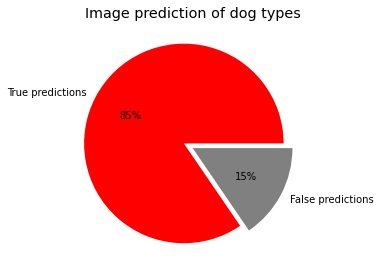

In [355]:
# A pie chart to show the percentage of image correctly predicted and those not correctly predicted 
plt.pie((T, F), labels=("True predictions", "False predictions"),autopct='%1.0f%%', colors=("red", "gray"), explode = (0.1, 0)),
plt.title('Image prediction of dog types')
plt.tight_layout();

From the pie chart above, we see that about 85% of the dog breeds were correctly predicted using their image(s), while about 15% were not correctly predicted.

2. Below, we wish to find out how the different dog stages were rated.

In [356]:
# Finding out the mean rating of the various dog stages
master_df.groupby('dog_stage').rating_numerator.mean().sort_values(ascending=False)

dog_stage
doggo, puppo      13.000000
floofer           12.000000
puppo             12.000000
doggo             11.888889
doggo, floofer    11.000000
doggo, pupper     11.000000
pupper            10.635000
Name: rating_numerator, dtype: float64

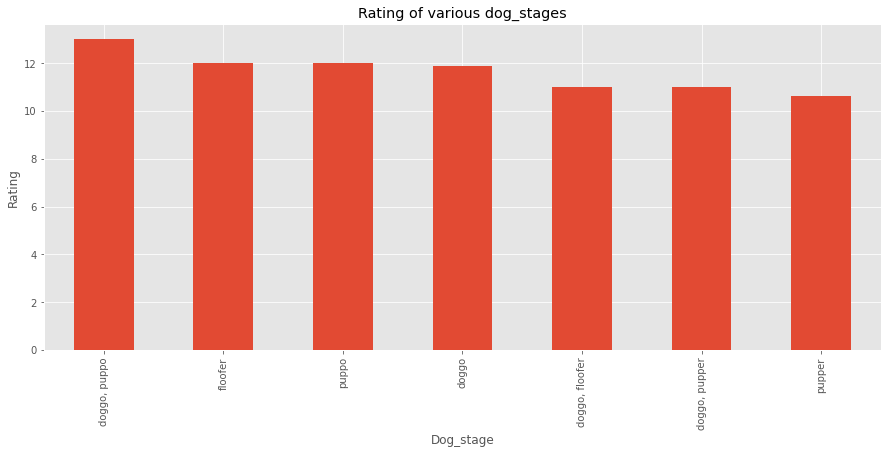

In [357]:
# A bar chart to show the mean rating of the various dog stages
master_df.groupby('dog_stage').rating_numerator.mean().sort_values(ascending=False).plot(kind='bar', figsize=(15,6))
plt.title('Rating of various dog_stages')
plt.xlabel('Dog_stage')
plt.ylabel('Rating');

From the bar chart above, we can see how  dogs of various stages were rated. The dogs in the doggo_puppo dog_stage were rated highest, while the those in the pupper stage were least in the ratings.

In [358]:
master_df.head(2)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,13,10,Phineas,NaN,33695.0,6969.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,NaN,29218.0,5272.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


3. Comparing the favorite counts generated by the different dog_stagess on twitter 

In [359]:
# Finding out the mean favorite counts of the various dog stages
master_df.groupby('dog_stage').favorite_count.mean().sort_values(ascending=False)

dog_stage
doggo, puppo      41806.000000
puppo             19502.863636
doggo             17531.354839
doggo, floofer    14797.000000
doggo, pupper     12669.250000
floofer           11177.285714
pupper             6226.030000
Name: favorite_count, dtype: float64

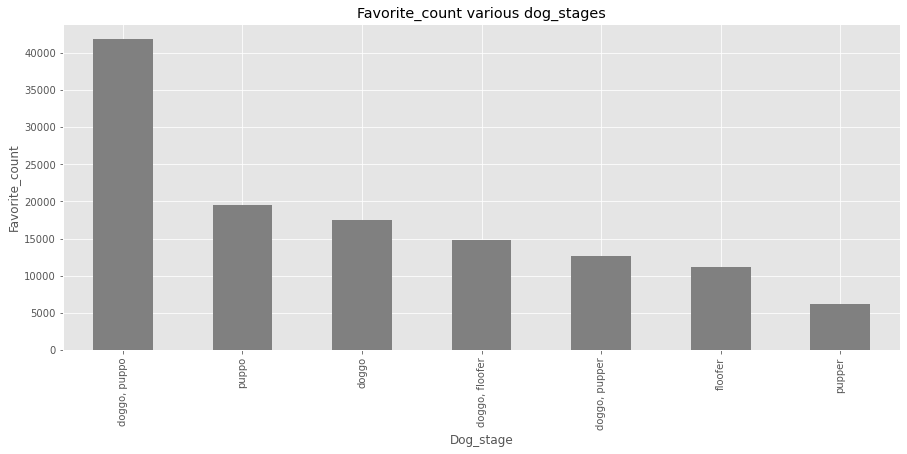

In [360]:
# A bar chart to show the mean favorite counts of the various dog stages
master_df.groupby('dog_stage').favorite_count.mean().sort_values(ascending=False).plot(kind='bar', figsize=(15,6),color="gray")
plt.title('Favorite_count various dog_stages')
plt.xlabel('Dog_stage')
plt.ylabel('Favorite_count');

From the bar chart above, we can see how dogs of various stages gathered favorite counts. The dogs in the doggo_puppo stage gathered the highest favorite counts. We see from the chart that the favorite counts for this stage was almost double those of the second highest dog stage which is puppo. Dogs in the pupper stage gathered the least favorite counts.

# Summary and Conclusion

Data from the WeRateDogs tweets were gathered, assesesed, cleaned and analyzed. The following insights and conclusions were made.<br>

1.About 85% of the dog breeds were correctly predicted using their image(s), while about 15% were not correctly predicted. Thus, we conclude, using the available data, that a dog’s breed can be predicted correctly by looking at its image.<br>

2.The dogs in the doggo_puppo stage are clearly much loved as they gathered the highest favorite counts and the highest rating. Their favorite counts was almost double the favorite counts of the second highest dog stage which is puppo. Dogs in the pupper stage appear to be least loved. They had the least favorite counts as well as the least rating.
